# Compare to GP beams
- This uses the GP beams and the regridded drift scan beams

In [1]:
import os
from astropy.io import fits
import pandas as pd
#from astropy import modeling
import numpy as np
import matplotlib as mpl
from matplotlib import gridspec
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.interpolate import RectBivariateSpline
from reproject import reproject_interp
from astropy.modeling import models, fitting
import csv
from astropy.io import ascii

mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
mpl.rcParams['font.size'] = '20'
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

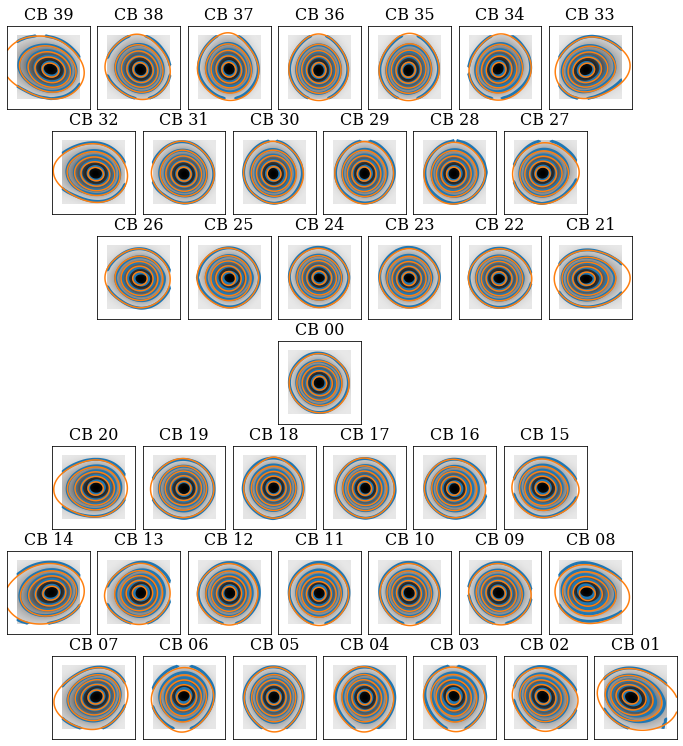

In [2]:
#all beams gaussian comparison

date = '201028'
nrows = 7
ncols = 7*2+1
beams = 40


fig = plt.figure(figsize=(12,13.2))
gs = gridspec.GridSpec(nrows=nrows, ncols=ncols, figure=fig) #, width_ratios=[1]*ncols, height_ratios=[1]*nrows, wspace=0.4, hspace=0.7)

# Arrange the plots approx according to beam spacing (only beam 0 really fails)
ax = [None] * beams
for b in range(beams-1,-1,-1):
    if (b <= 39) & (b >= 33):
        ax[b] = fig.add_subplot(gs[0,2*(39-b):2*(39-b)+2])
    if (b <= 32) & (b >= 27):
        ax[b] = fig.add_subplot(gs[1,2*(32-b)+1:2*(32-b)+2+1])
    if (b <= 26) & (b >= 21):
        ax[b] = fig.add_subplot(gs[2,2*(26-b)+2:2*(26-b)+2+2])
    if (b == 0):
        ax[b] = fig.add_subplot(gs[3,2*3:2*3+2])
    if (b <= 20) & (b >= 15):
        ax[b] = fig.add_subplot(gs[4,2*(20-b)+1:2*(20-b)+2+1])
    if (b <= 14) & (b >= 8):
        ax[b] = fig.add_subplot(gs[5,2*(14-b):2*(14-b)+2])
    if (b <= 7) & (b >= 1):
        ax[b] = fig.add_subplot(gs[6,2*(7-b)+1:2*(7-b)+2+1])
    ax[b].set_xticks([])
    ax[b].set_yticks([])

    
for b in range(beams):
    hdulist_regrid = fits.open('/tank/denes/drift_scan/{}/cont/{}_{:02}_I_model_reg.fits'.format(date, date, b))
    data_regrid = hdulist_regrid[0].data
    header_regrid = hdulist_regrid[0].header
    
    hdulist_gaus = fits.open('/tank/denes/cbeams/{:02}_gp_avg_norm.fits'.format(b))
    data_gaus = hdulist_gaus[0].data
    header_gaus = hdulist_gaus[0].header

    ax[b].imshow(data_regrid[900:2200,900:2200], vmin=-0.1, vmax=1.0, cmap='binary')
    ax[b].set_title('CB '+str(b).zfill(2), fontsize=16)
    #ax[b].scatter(c1,c2,s=2, color='k')
    #ax[b].scatter(c1_o,c2_o,s=2, color='grey')
    ax[b].contour(data_regrid[900:2200,900:2200], levels=[0.1,0.3,0.5,0.7,0.9], colors='C0', linewidths=3)
    ax[b].contour(data_gaus[900:2200,900:2200], levels=[0.1,0.3,0.5,0.7,0.9], colors='C1')
    ax[b].invert_yaxis()
    #ax[b].xlim(1000,2100)
    #ax[b].ylim(1000,2100)


plt.savefig('/tank/denes/drift_scan/plots/{}_drift_gp_norm.png'.format(date), bbox_inches="tight", dpi=200)


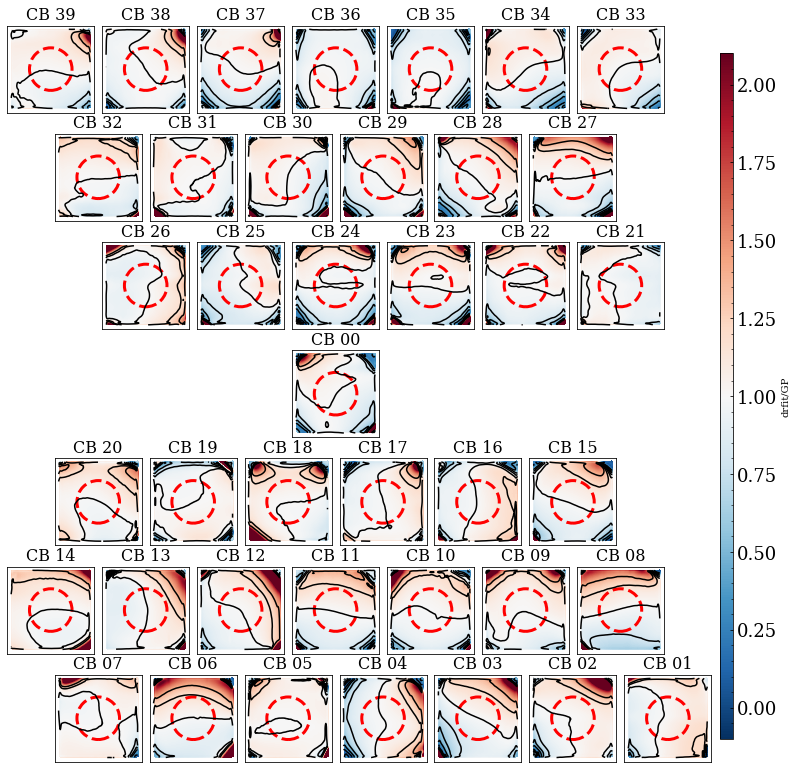

In [3]:
#all beams gaussian comparison

date = '201028'
nrows = 7
ncols = 7*2+1
beams = 40


fig = plt.figure(figsize=(12,13.6))
gs = gridspec.GridSpec(nrows=nrows, ncols=ncols, figure=fig) #, width_ratios=[1]*ncols, height_ratios=[1]*nrows, wspace=0.4, hspace=0.7)

# Arrange the plots approx according to beam spacing (only beam 0 really fails)
ax = [None] * beams
for b in range(beams-1,-1,-1):
    if (b <= 39) & (b >= 33):
        ax[b] = fig.add_subplot(gs[0,2*(39-b):2*(39-b)+2])
    if (b <= 32) & (b >= 27):
        ax[b] = fig.add_subplot(gs[1,2*(32-b)+1:2*(32-b)+2+1])
    if (b <= 26) & (b >= 21):
        ax[b] = fig.add_subplot(gs[2,2*(26-b)+2:2*(26-b)+2+2])
    if (b == 0):
        ax[b] = fig.add_subplot(gs[3,2*3:2*3+2])
    if (b <= 20) & (b >= 15):
        ax[b] = fig.add_subplot(gs[4,2*(20-b)+1:2*(20-b)+2+1])
    if (b <= 14) & (b >= 8):
        ax[b] = fig.add_subplot(gs[5,2*(14-b):2*(14-b)+2])
    if (b <= 7) & (b >= 1):
        ax[b] = fig.add_subplot(gs[6,2*(7-b)+1:2*(7-b)+2+1])
    ax[b].set_xticks([])
    ax[b].set_yticks([])

    
for b in range(beams):
    hdulist_regrid = fits.open('/tank/denes/drift_scan/{}/cont/{}_{:02}_I_model_reg.fits'.format(date, date, b))
    data_regrid = hdulist_regrid[0].data
    header_regrid = hdulist_regrid[0].header
    
    hdulist_gaus = fits.open('/tank/denes/cbeams/{:02}_gp_avg_norm.fits'.format(b))
    data_gaus = hdulist_gaus[0].data
    header_gaus = hdulist_gaus[0].header
    
    ratio = data_regrid[1000:2100,1000:2100]/data_gaus[1000:2100,1000:2100]
    
    cb = ax[b].imshow(ratio, vmin=-0.1, vmax=2.1, cmap='RdBu_r')
    ax[b].set_title('CB '+str(b).zfill(2), fontsize=16)
    #ax[b].scatter(c1,c2,s=2, color='k')
    #ax[b].scatter(c1_o,c2_o,s=2, color='grey')
    ax[b].contour(ratio, levels=[0,0.2,.4,.60,.80, 1, 1.2, 1.4], colors='black')
    ax[b].invert_yaxis()
    #ax[b].xlim(1000,2100)
    #ax[b].ylim(1000,2100)
    circle = plt.Circle((550,550),269, color='r', fill=False, linewidth=3, linestyle='--')
    ax[b].add_patch(circle)
    
fig.subplots_adjust(right=0.94)
cbar_ax = fig.add_axes([0.95, 0.15, 0.015, 0.7])
cbar =fig.colorbar(cb, cax=cbar_ax)
cbar.minorticks_on()
cbar.ax.tick_params(labelsize=18) 
cbar.set_label('drfit/GP')


plt.savefig('/tank/denes/drift_scan/plots/{}_drift_gp_norm_diff.png'.format(date), bbox_inches="tight", dpi=200)


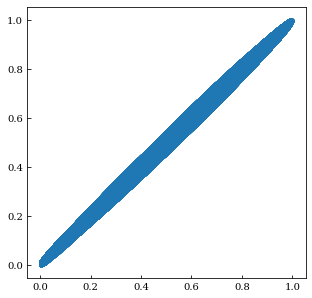

In [4]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
plt.scatter(data_regrid[1000:2100,1000:2100],data_gaus[1000:2100,1000:2100], marker='o', c='C0', s=10)
plt.show()

In [5]:
ratio = []
beams = 40 

for b in range(beams):
    hdulist_regrid = fits.open('/tank/denes/drift_scan/{}/cont/{}_{:02}_I_model_reg.fits'.format(date, date, b))
    data_regrid = hdulist_regrid[0].data
    header_regrid = hdulist_regrid[0].header
    
    hdulist_gaus = fits.open('/tank/denes/cbeams/{:02}_gp_avg_norm.fits'.format(b))
    data_gaus = hdulist_gaus[0].data
    header_gaus = hdulist_gaus[0].header
    
    r0 = data_regrid[1000:2100,1000:2100]/data_gaus[1000:2100,1000:2100]
    r1 = np.reshape(r0, (1100*1100))
    r2 = r1[~np.isnan(r1)]
    
    ratio.append(r2)
    
ratio = np.array(r2)

In [6]:
ratio.shape
print(len(r2))

1000118


average ratio:  1.0319904


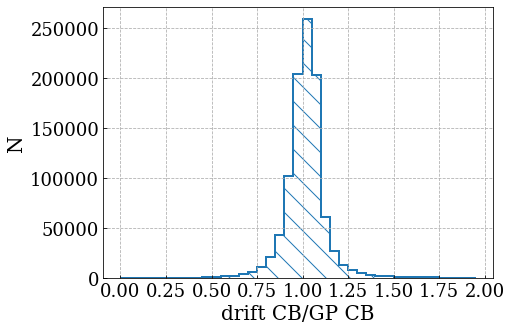

In [10]:
#plot the cold gas fraction

fig = plt.figure(figsize=(7.,5.))
plt.axes(frameon=False)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(1,1,1)
ax.grid(True, linestyle='--')
plt.hist(ratio, bins=np.arange(0,2,0.05), histtype='step', color='C0', hatch='\\', linewidth=2)
plt.xticks(family='serif',size=18)
plt.yticks(family='serif',size=18)
#ax.set_ybound(0, 20)
ax.set_xlabel('drift scan CB/GP CB', size=20,family='serif')
ax.set_ylabel('N', size=20,family='serif')

plt.savefig('{}_drift_gp_norm_hist.png'.format(date), bbox_inches='tight', dpi=200)

print('average ratio: ',np.mean(ratio))

# Calculate FWHM for GP beams

-116.14784329591369
-19.597845572053483
-398.6833507738457
25.12494200858308
102.54837177676602
-0.2458576899140459
-211.36371090892155
-71.01583835096193
-11.292439320688944
-42.29460291734963
-69.32019952974882
2.0563476283645317
-9.050547449640064
14.390172723906609
12.761787980387348
-10.764906804356198
-17.41307951677176
-57.27347036797735
-35.89311989913814
0.10392302175844548
1.8801436098112514


/home/apercal/pipeline/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


-0.3950193038468432
83.68698703458614
49.47456494054184
-393.89934994799796
-110.29748446285842
-8.349055653894153
-168.47750533932992
-22.277978007086336
3.290714411671885
-66.57417955236545
-36.905431343264404
-10.397676487115776
-432.62946442175377
-21.355730029173895
-8.001588609642067
3.9674316726015584
17.174711406946024
-222.77443078918887
-109.11827364213661


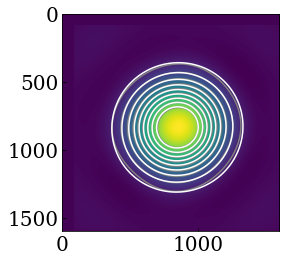

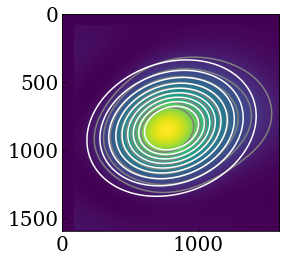

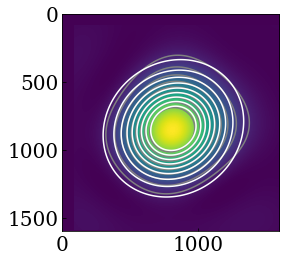

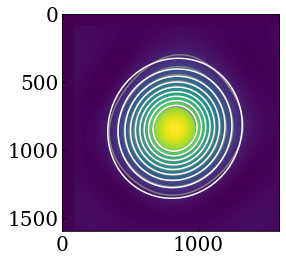

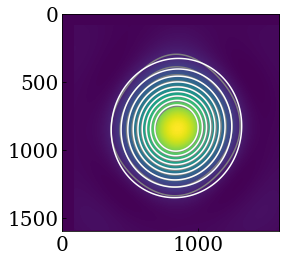

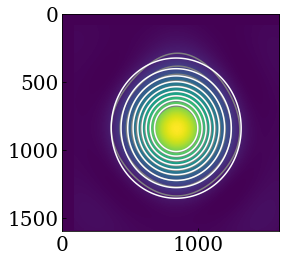

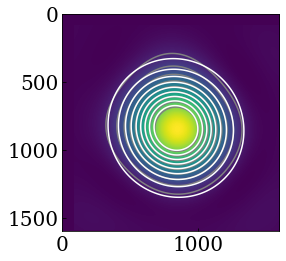

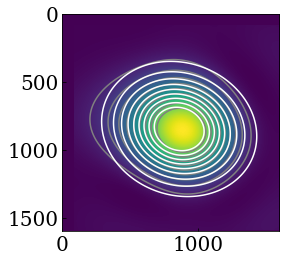

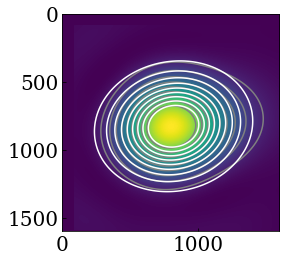

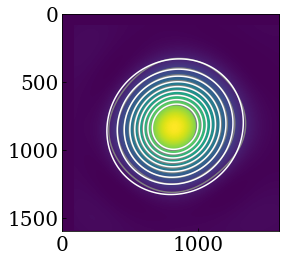

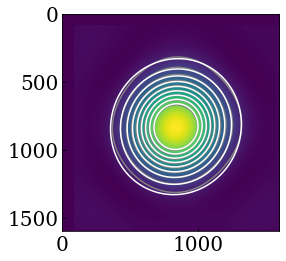

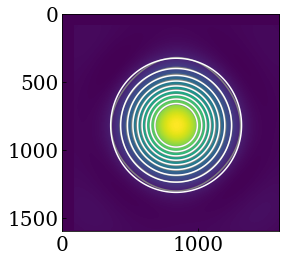

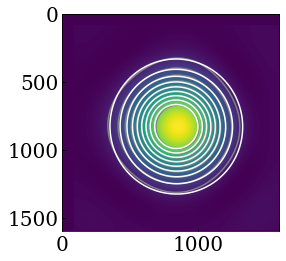

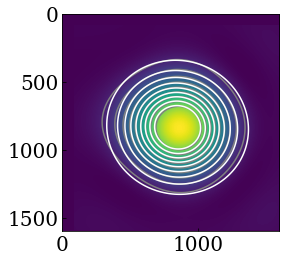

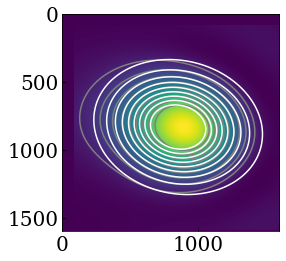

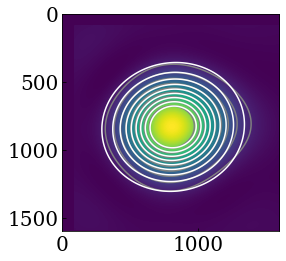

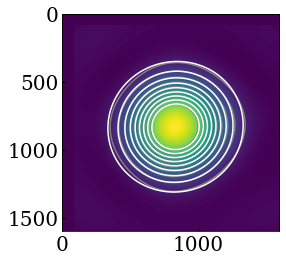

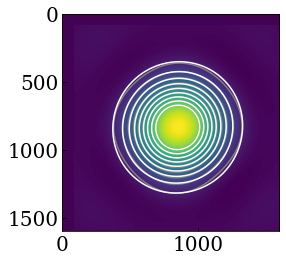

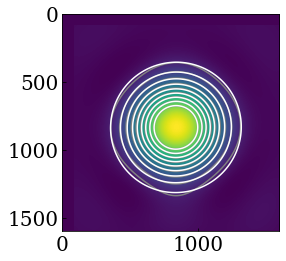

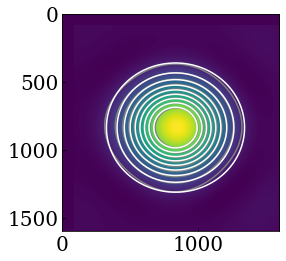

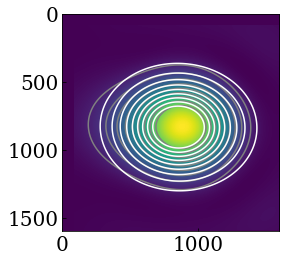

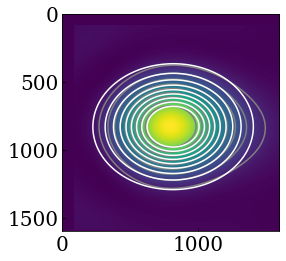

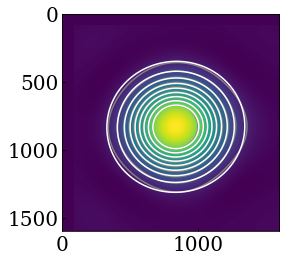

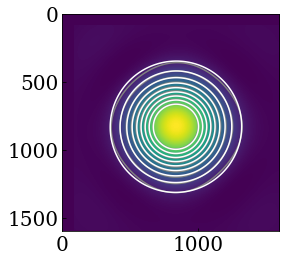

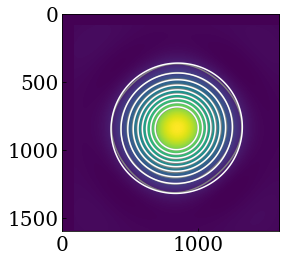

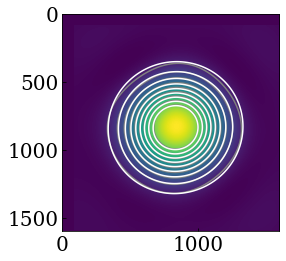

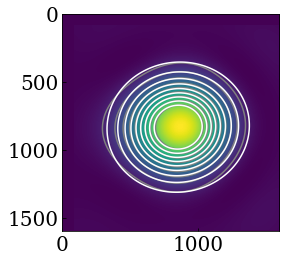

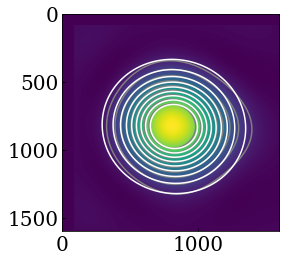

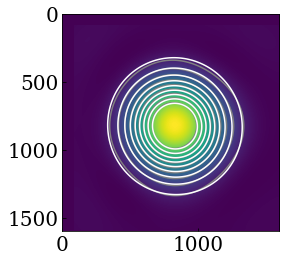

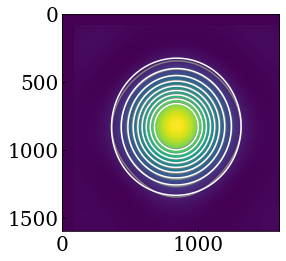

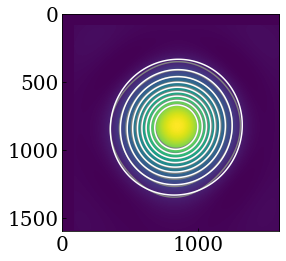

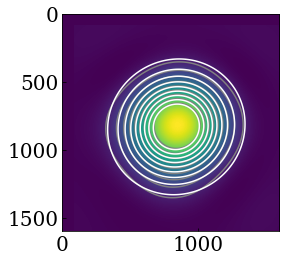

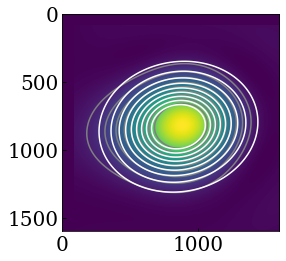

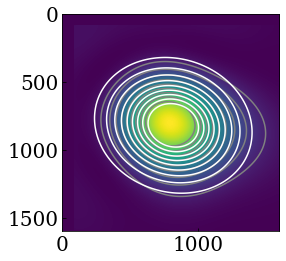

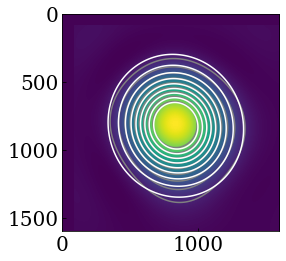

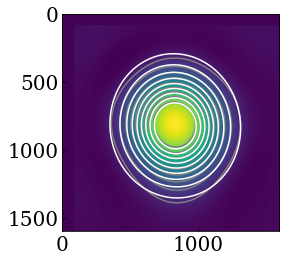

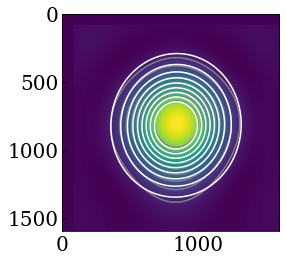

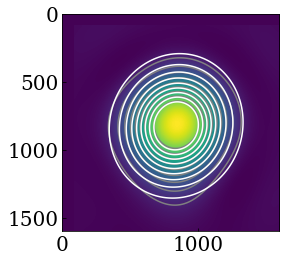

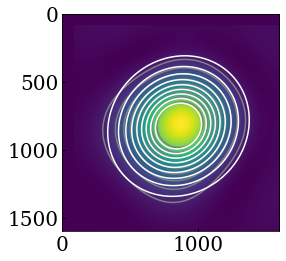

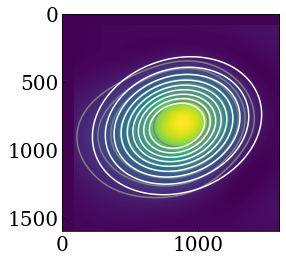

In [35]:
# calculate FWHM for GP beams

fwhm_x = []
fwhm_y = []
fwhm_av = []
ang = []
cent_x = []
cent_y = []

for beam in range(0,40):
    av = []
    x = []
    y = []
    ang1 = []
    hdulist = fits.open('/tank/denes/cbeams/{:02}_gp_avg_orig.fits'.format(beam))
    data = hdulist[0].data
    h = hdulist[0].header
    data = np.nan_to_num(data[700:2300,700:2300])

    med = np.median(data) 
    # data = data - med
    # data = data[0,0,:,:] # NOT SURE THIS IS NEEDED!

    fit_w = fitting.LevMarLSQFitter()

    y0, x0 = np.unravel_index(np.argmax(data), data.shape)
    sigma = np.std(data)
    amp = np.max(data)

    w = models.Gaussian2D(amp, x0, y0, sigma, sigma)
    yi, xi = np.indices(data.shape)
    g = fit_w(w, xi, yi, data)
    print(np.rad2deg(g.theta.value))
    #print(g.x_fwhm*abs(h['CDELT1'])*60, g.y_fwhm*abs(h['CDELT1'])*60)
    model_data = g(xi, yi)

    x = np.append(x, g.x_fwhm*abs(h['CDELT1'])*60)
    y = np.append(y, g.y_fwhm*abs(h['CDELT1'])*60)
    av = np.append(av, (g.x_fwhm*abs(h['CDELT1'])*60 + g.y_fwhm*abs(h['CDELT1'])*60)/2)
    ang1 = np.append(ang1, np.rad2deg(g.theta))

    fwhm_x = x
    fwhm_y = y
    fwhm_av = av
    ang = ang1
    cent_x = x0
    cent_y = y0
    

    fig, ax = plt.subplots()
    ax.imshow(data, label='Gaussian') 
    ax.contour(data, levels=np.arange(0.1,1,0.1), colors='grey') 
    ax.contour(model_data, levels=np.arange(0.1,1,0.1), colors='w') 
    #plt.xlim(700,2300)
    #plt.ylim(700,2300)
    plt.savefig('/tank/denes/drift_scan/plots/{}_GP_orig.png'.format(beam), bbox_inches="tight", dpi=200)



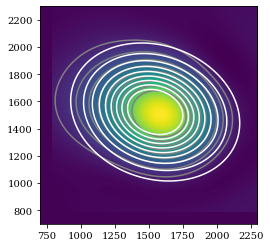

In [8]:
fig, ax = plt.subplots()
ax.imshow(data, label='Gaussian') 
ax.contour(data, levels=np.arange(0.1,1,0.1), colors='grey') 
ax.contour(model_data, levels=np.arange(0.1,1,0.1), colors='w') 
plt.xlim(700,2300)
plt.ylim(700,2300)
plt.show()

In [ ]:
# Fit a 2D gaussian and write data into csv file
# it is important to trim the data from the fits file a bit to make the fit work

def fit_fwhm():

    with open('/tank/denes/cbeams/beam_FWHM_norm.csv', mode='w') as fwhm_file:
        fwhm_writer = csv.writer(fwhm_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        fwhm_writer.writerow(['Beam', 'FWHM_x', 'FWHM_y', 'FWHM_av', 'pos_angle', 'x_0', 'y_0'])

        for beam in range(0,40):
            hdulist = fits.open('/tank/denes/cbeams/{:02}_gp_avg_norm.fits'.format(beam))
            data = hdulist[0].data
            h = hdulist[0].header
            data = np.nan_to_num(data[700:2300,700:2300])
            #print(h)

            med = np.median(data) 
            # data = data - med
            # data = data[0,0,:,:] # NOT SURE THIS IS NEEDED!

            fit_w = fitting.LevMarLSQFitter()

            y0, x0 = np.unravel_index(np.argmax(data), data.shape)
            sigma = np.std(data)
            amp = np.max(data)

            w = models.Gaussian2D(amp, x0, y0, sigma, sigma)
            yi, xi = np.indices(data.shape)
            g = fit_w(w, xi, yi, data)
            #print(g.x_fwhm*abs(h['CDELT1'])*60, g.y_fwhm*abs(h['CDELT1'])*60)
            model_data = g(xi, yi)

            print(g.x_fwhm*abs(h['CDELT1'])*60)
            print(g.y_fwhm*abs(h['CDELT1'])*60)
            print((g.x_fwhm*abs(h['CDELT1'])*60 + g.y_fwhm*abs(h['CDELT1'])*60)/2)

            fwhm_writer.writerow([beam, g.x_fwhm*abs(h['CDELT1'])*60, g.y_fwhm*abs(h['CDELT1'])*60, (g.x_fwhm*abs(h['CDELT1'])*60 + g.y_fwhm*abs(h['CDELT1'])*60)/2, (g.theta * (180 / np.pi)), x0, y0] )

fit_fwhm()

34.004314676280174
34.7343588810986
34.36933677868939
45.38638221622983
34.25282991060362
39.81960606341673
34.384582926264066
38.19293955325074
36.288761239757406
37.06349533788069
34.76231731679138
35.91290632733603
34.15730420990405
36.69840754063367
35.42785587526886
33.75240861892288
36.41960208591356
35.08600535241822
35.06916584886336
36.69634873038685
35.882757289625104
41.40564468052665
34.73951869985906
38.072581690192855
41.778573246653174
33.95471587943865
37.86664456304591
36.45464160488373
34.22482127538864
35.33973144013619
33.83798867285384
35.6199548559386
34.72897176439622
34.279380561649376
35.13485180277067
34.70711618221002
34.5416481431921
35.17556540762941
34.858606775410756
34.933709929770004
37.21836742410394
36.076038676936975
44.43816645304069
34.68596359582816
39.562065024434425
37.54690965129608
33.66657965933821
35.606744655317144
35.01491344555272
33.55372253638109
34.284317990966905
34.61074741131482
33.656290492923816
34.13351895211932
34.33764452391796

In [ ]:
# plot FWHM for all beams at different dates
# loop troug all frequencies


#n = len(dates)
#colors = mpl.cm.Blues(np.linspace(0,1,n))

fig = plt.figure( figsize=(12, 8))
ax = fig.add_subplot(111)
ax.set_title('GP FWHM')
data = ascii.read('/tank/denes/cbeams/beam_FWHM_norm.csv', format='csv', fast_reader=False)

ax.plot(range(40), data['FWHM_x'], marker='o', color='C0', lw=2)
ax.plot(range(40), data['FWHM_y'], marker='o', color='C1', lw=2)
ax.plot(range(40), data['FWHM_av'], marker='o', color='gray', lw=2)


ax.set_ylabel('FWHM [\']', fontsize=20)
ax.set_xlabel('Beams', fontsize=20)
ax.set_xlim(0,39)
#ax.set_ylim(27,43)
ax.set_xticks(range(0,40,5))
#ax.set_yticks(range(27,44))
plt.grid(linestyle='--', alpha=0.5)
#ax.legend(bbox_to_anchor=(1.03, 1.05), fontsize=15) 
plt.savefig('/tank/denes/drift_scan/plots/FWHMs_GP_norm.png', bbox_inches="tight", dpi=200)


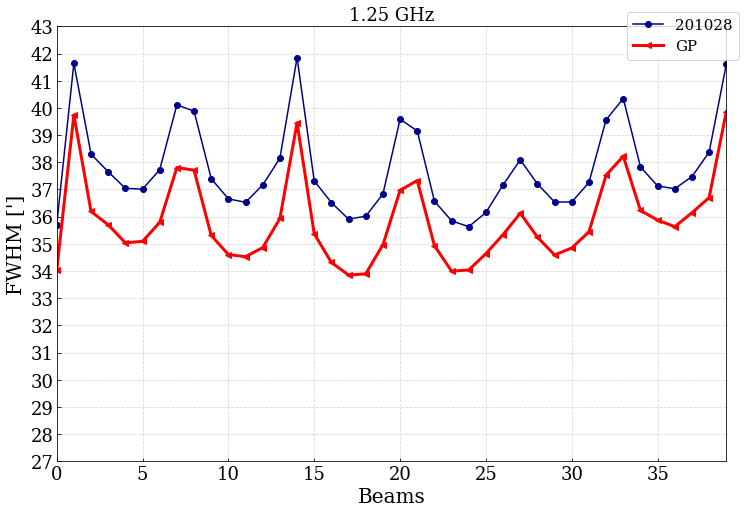

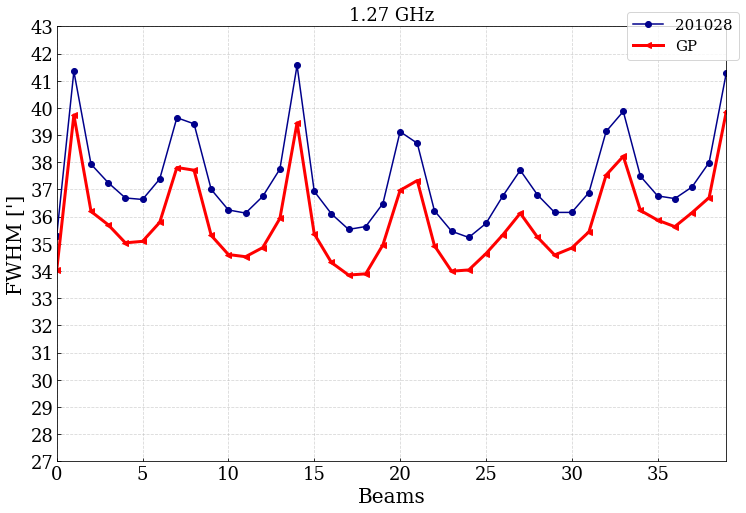

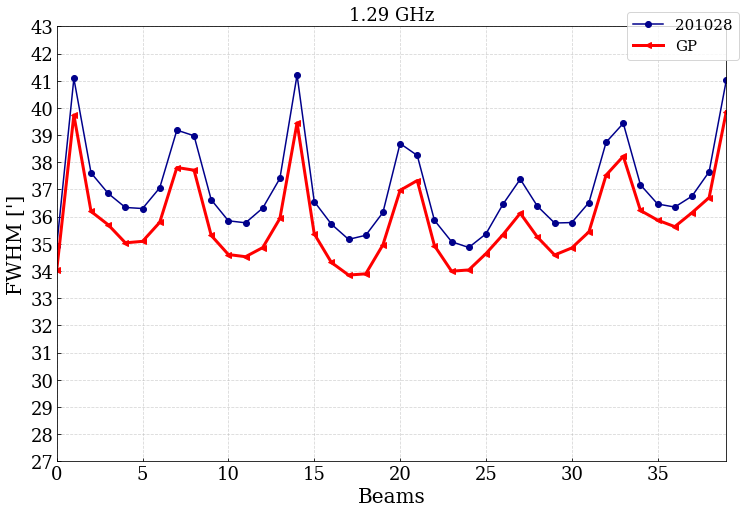

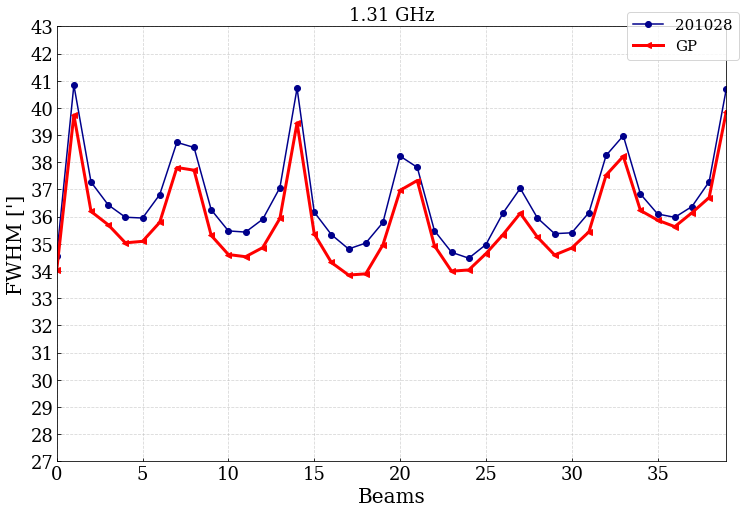

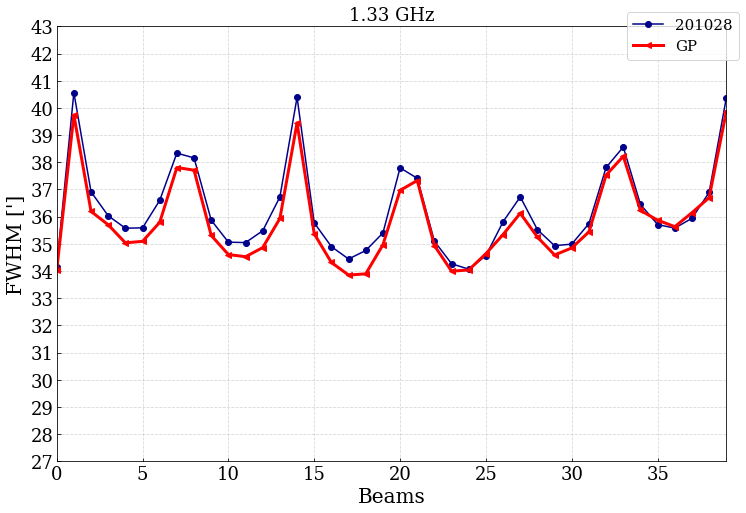

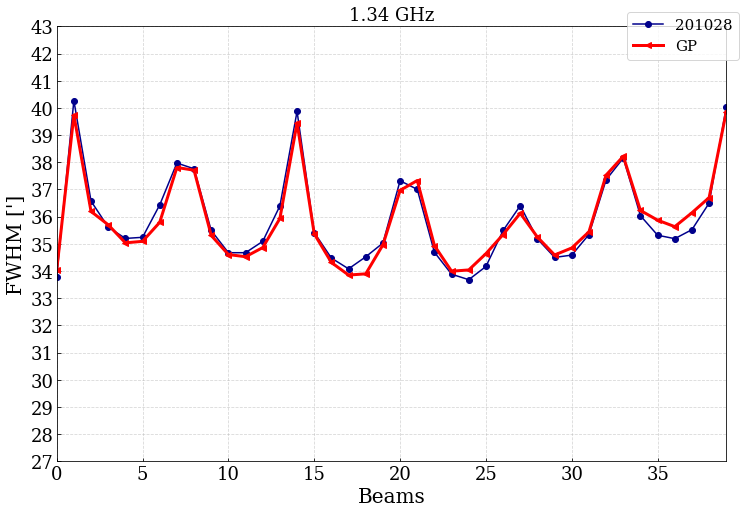

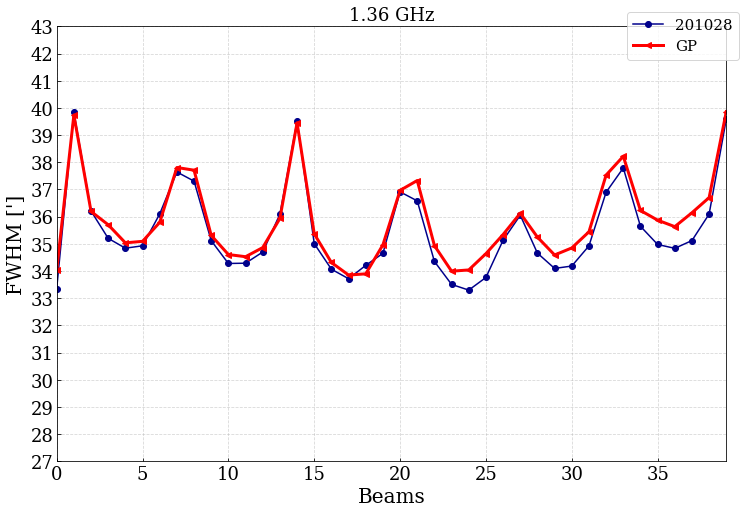

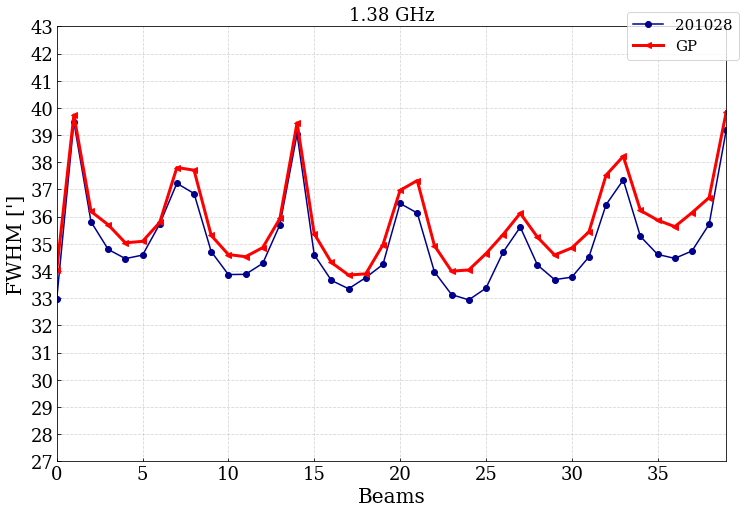

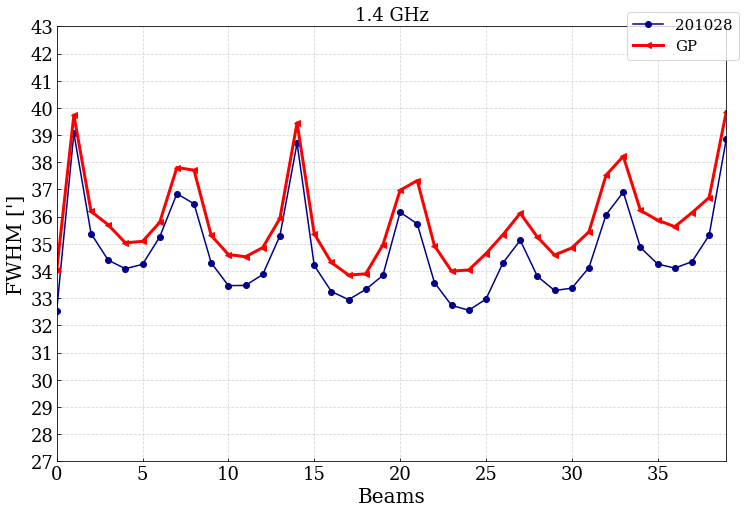

In [49]:
# plot FWHM for all beams at different dates
# loop troug all frequencies

#dates = ['190628', '190722', '190821', '190826', '190912', '190916', '190918', '191008', '191023', '191026', '191120', '200130', '200430', '200710', '200819', '201009', '201028', '201218']
dates = ['201028']
freq_label = np.array([1234867750.0, 1253178250.0, 1271488750.0, 1289799250.0, 1308109750.0, 1326420250.0, 1344730750.0, 1363041250.0, 1381351750.0, 1399662250.0])
freq_label_gh = np.round(freq_label/1e9,2)

n = len(dates)
colors = mpl.cm.Blues(np.linspace(0,1,n))

data_gp = ascii.read('/tank/denes/cbeams/beam_FWHM_orig.csv', format='csv', fast_reader=False)


for freq in range(1,10):
    fig = plt.figure( figsize=(12, 8))
    ax = fig.add_subplot(111)
    ax.set_title('{} GHz'.format(freq_label_gh[freq]), fontsize=18)
    for i in range(len(dates)):
        data = ascii.read('/tank/apertif/driftscans/fits_files/{}/beam_FWHM_{}_I_{}.csv'.format(dates[i], dates[i], freq), format='csv', fast_reader=False)

        #ax.plot(range(40), data['FWHM_av'], marker='o', label=dates[i], color=colors[i])
        ax.plot(range(40), data['FWHM_av'], marker='o', label=dates[i], color='darkblue')
    ax.plot(range(40), data_gp['FWHM_av'], marker='<', label='GP', color='red', lw=3)

    ax.set_ylabel('FWHM [\']', fontsize=20)
    ax.set_xlabel('Beams', fontsize=20)
    ax.set_xlim(0,39)
    ax.set_ylim(27,43)
    ax.set_xticks(range(0,40,5))
    ax.set_yticks(range(27,44))
    ax.tick_params(axis='both', which='major', labelsize=18)
    plt.grid(linestyle='--', alpha=0.5)
    ax.legend(bbox_to_anchor=(1.03, 1.05), fontsize=15) 
    plt.savefig('/tank/denes/drift_scan/plots/FWHMs_chan_{}_gp_v2.png'.format(freq), bbox_inches="tight", dpi=200)


16


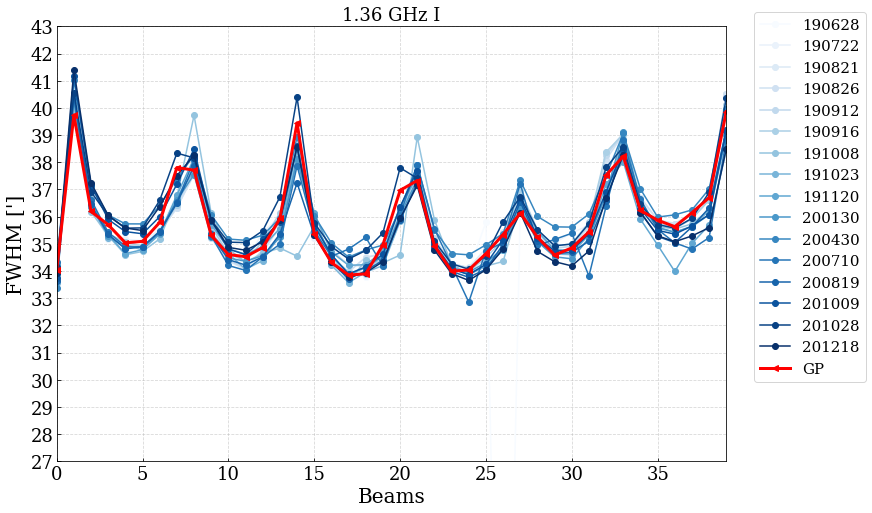

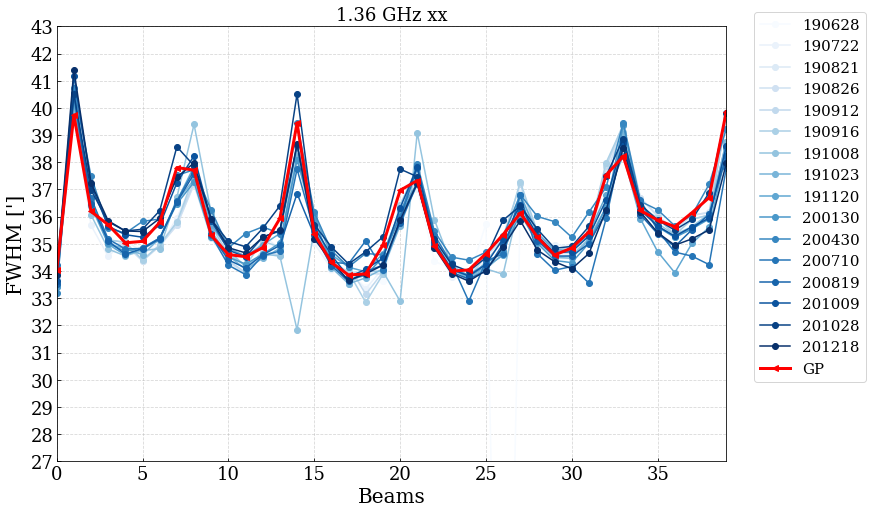

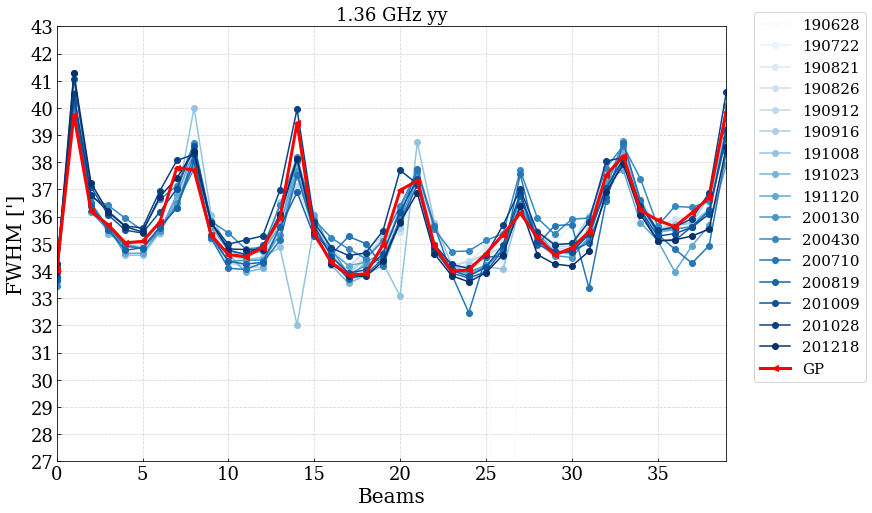

In [50]:
# plot FWHM for all beams at different dates
# loop troug all frequencies

bad_dates = ['190918','191026']
#dates = ['190628', '190722', '190821', '190826', '190912', '190916', '190918', '191008', '191023', '191026', '191120', '200130', '200430', '200710', '200819', '201009', '201028', '201218']
#dates = ['190628', '190722', '190821', '190826', '190912', '190916', '191008', '191023', '191120', '200130', '200430', '200710', '200819', '201009']
dates = ['190628', '190722', '190821', '190826', '190912', '190916', '191008', '191023', '191120', '200130', '200430', '200710', '200819', '201009', '201028', '201218']

print(len(dates))
#freq = '5'

data_gp = ascii.read('/tank/denes/cbeams/beam_FWHM_orig.csv', format='csv', fast_reader=False)


freq_label = []
CRVAL3_new = 1280e6+(12.207e3*(-(24576/2-14000)))  #rewrite to this
CDELT3_new = 12.207e3*1050
for i in range(0,10):
    freq_label.append(CRVAL3_new+(i*CDELT3_new))
    
#freq_label = np.array([1234867750.0, 1253178250.0, 1271488750.0, 1289799250.0, 1308109750.0, 1326420250.0, 1344730750.0, 1363041250.0, 1381351750.0, 1399662250.0])
freq_label = np.array(freq_label)
freq_label_gh = np.round(freq_label/1e9,2)

n = len(dates)
colors = mpl.cm.Blues(np.linspace(0,1,n))

for pol in ['I', 'xx', 'yy']:
    #for freq in range(1,10):
    for freq in range(5,6):
        fig = plt.figure( figsize=(12, 8))
        ax = fig.add_subplot(111)
        ax.set_title('{} GHz {}'.format(freq_label_gh[freq], pol), fontsize=18)
        for i in range(len(dates)):
            data = ascii.read('/tank/apertif/driftscans/fits_files/{}/beam_FWHM_{}_{}_{}.csv'.format(dates[i], dates[i], pol, freq), format='csv', fast_reader=False)

            ax.plot(range(40), data['FWHM_av'], marker='o', label=dates[i], color=colors[i])

        ax.plot(range(40), data_gp['FWHM_av'], marker='<', label='GP', color='red', lw=3)
        ax.set_ylabel('FWHM [\']', fontsize=20)
        ax.set_xlabel('Beams', fontsize=20)
        ax.set_xlim(0,39)
        ax.set_ylim(27,43)
        ax.set_xticks(range(0,40,5))
        ax.set_yticks(range(27,44))
        ax.tick_params(axis='both', which='major', labelsize=18)
        plt.grid(linestyle='--', alpha=0.5)
        ax.legend(bbox_to_anchor=(1.03, 1.05), fontsize=15) 
        plt.savefig('/tank/denes/drift_scan/plots/FWHMs_{}_chan_{}_v2.png'.format(pol, freq), bbox_inches="tight", dpi=200)


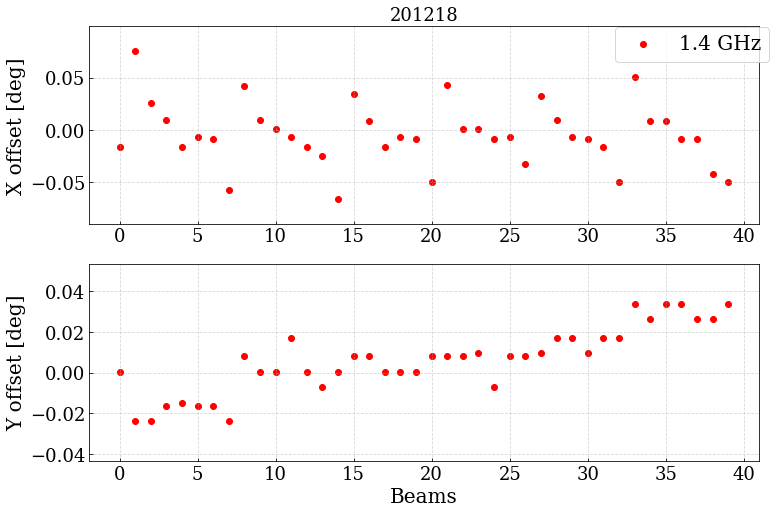

In [60]:
# plot position angle for all beams at different frequencies

dates = ['190628', '190722', '190821', '190826', '190912', '190916', '190918', '191008', '191023', '191026', '191120', '200130', '200430', '200710', '200819', '201009', '201028', '201218']
freq_label = np.array([1234867750.0, 1253178250.0, 1271488750.0, 1289799250.0, 1308109750.0, 1326420250.0, 1344730750.0, 1363041250.0, 1381351750.0, 1399662250.0])
freq_label_gh = np.round(freq_label/1e9,2)

n = 9
colors = mpl.cm.Blues(np.linspace(0,1,n))

data_gp = ascii.read('/tank/denes/cbeams/beam_FWHM_orig.csv', format='csv', fast_reader=False)
x_off_gp = (836.5-data_gp['x_0'])*(0.00111111115346)
y_off_gp = (836.5-data_gp['y_0'])*(0.00111111115346)

fig = plt.figure( figsize=(12, 8))
ax = fig.add_subplot(211)
ax.set_title(date, fontsize=18)
ax.scatter(range(40), x_off_gp, label='{} GHz'.format(freq_label_gh[freq]), color='red')
ax.set_ylabel('X offset [deg]', fontsize=20)
#ax.set_xlabel('Beams', fontsize=20)
#ax.set_ylim(-0.25,0.25)
#ax.set_ylim(-0.6,0.6)
ax.legend(bbox_to_anchor=(1.03, 1.05)) 
plt.grid(linestyle='--', alpha=0.5)
ax.tick_params(axis='both', which='major', labelsize=18)

ax = fig.add_subplot(212)
ax.scatter(range(40), y_off_gp, label=freq, color='red')
ax.set_ylabel('Y offset [deg]', fontsize=20)
ax.set_xlabel('Beams', fontsize=20)
#ax.set_ylim(-0.25,0.25)
#ax.set_ylim(-0.6,0.6)
plt.grid(linestyle='--', alpha=0.5)
ax.tick_params(axis='both', which='major', labelsize=18)

plt.savefig('/tank/denes/drift_scan/plots/xy_off_gp.png'.format(date), bbox_inches="tight", dpi=200)


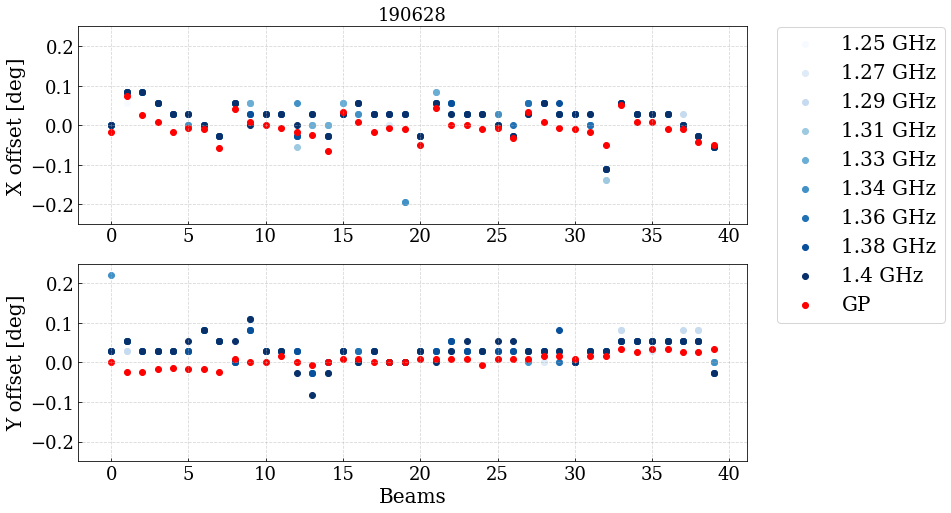

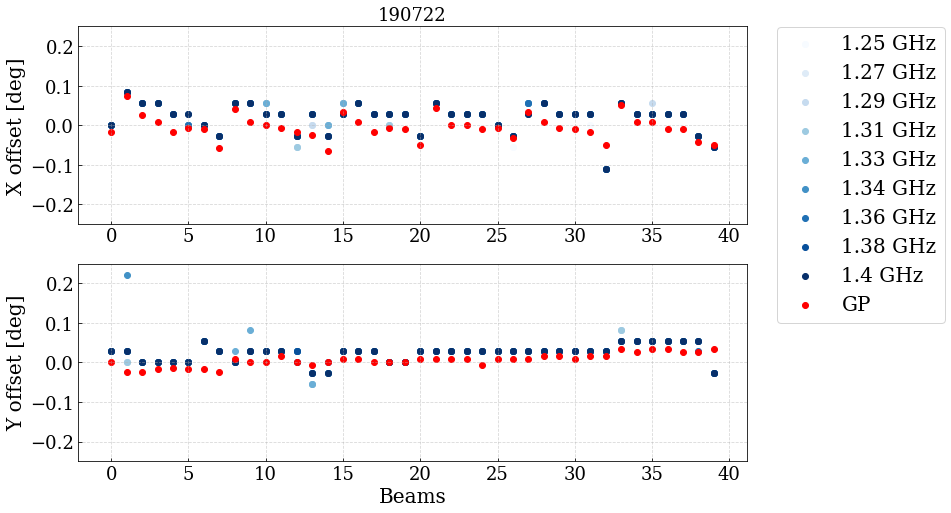

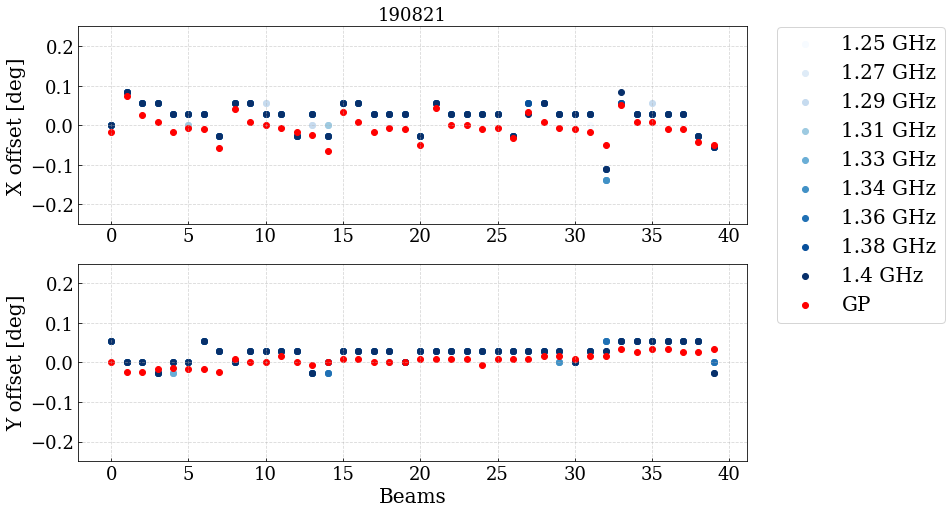

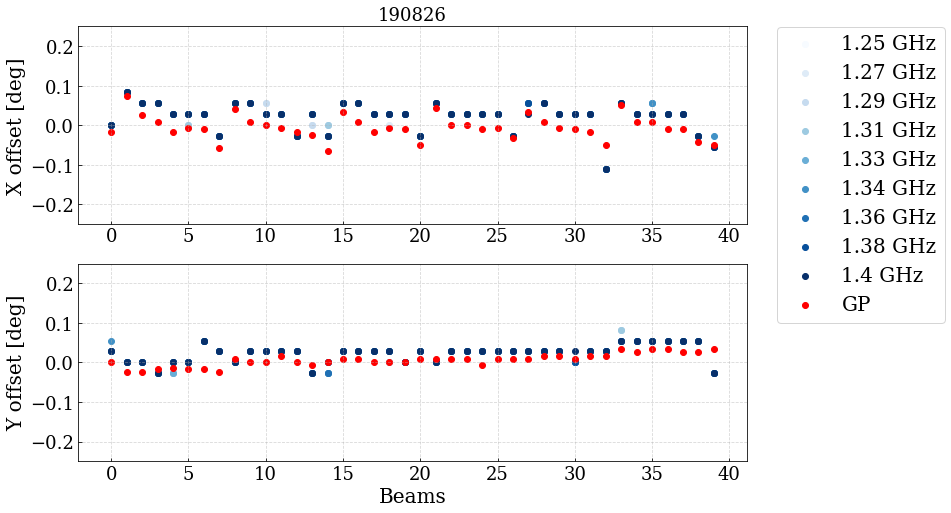

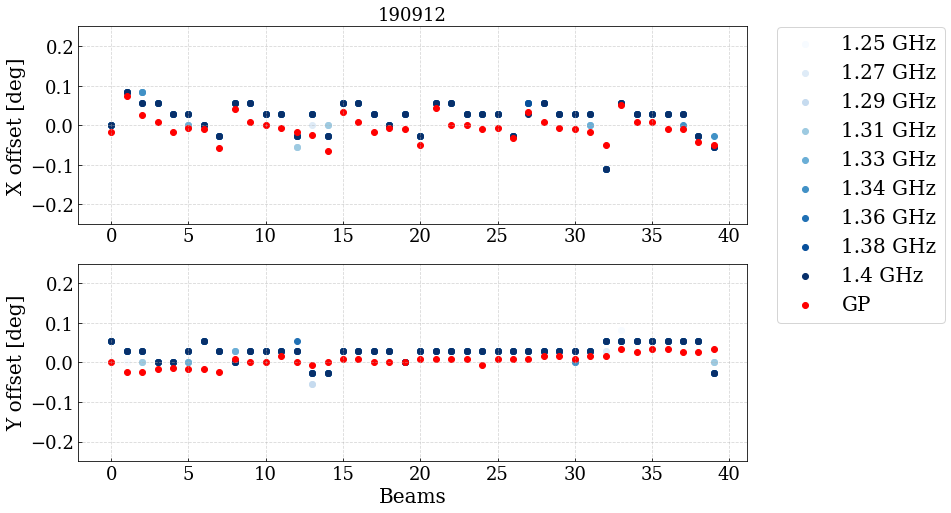

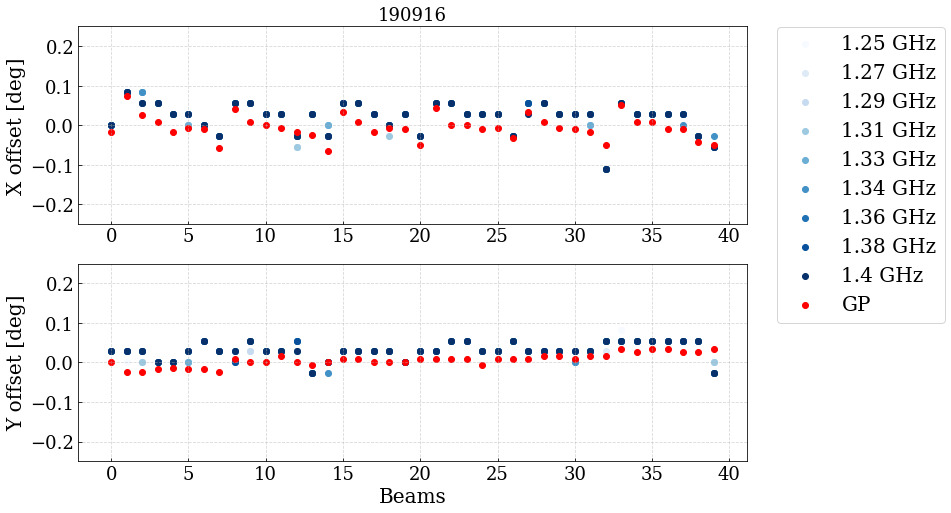

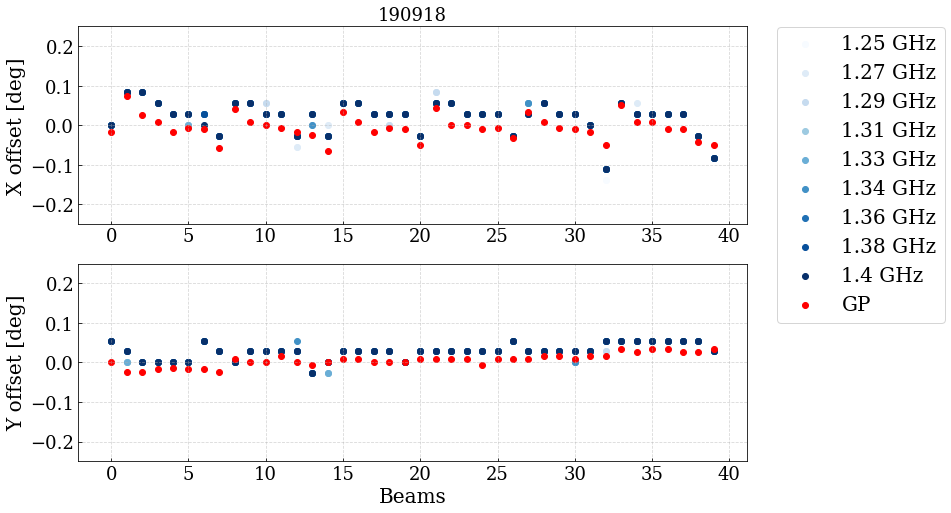

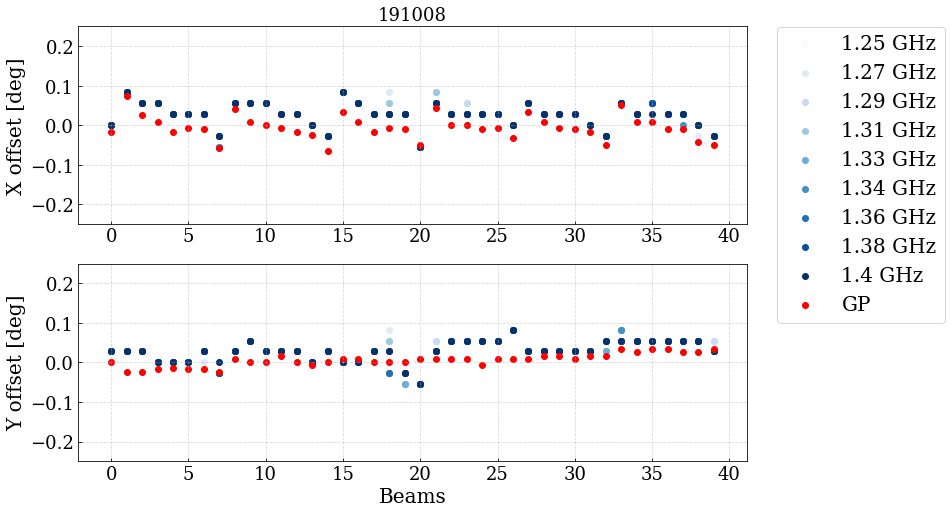

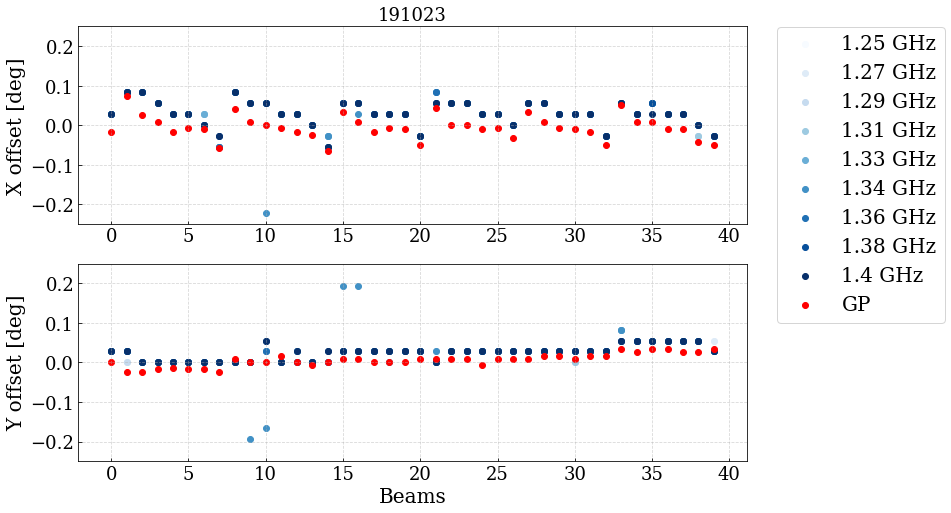

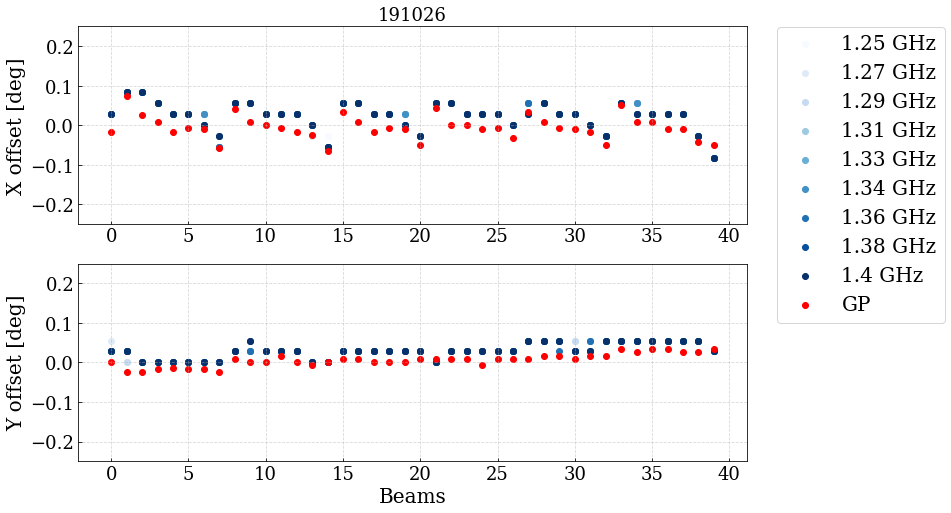

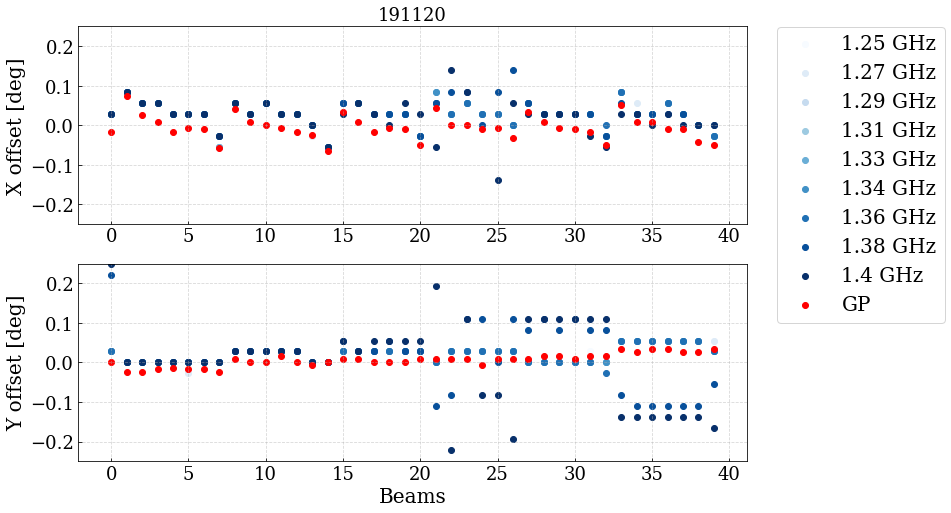

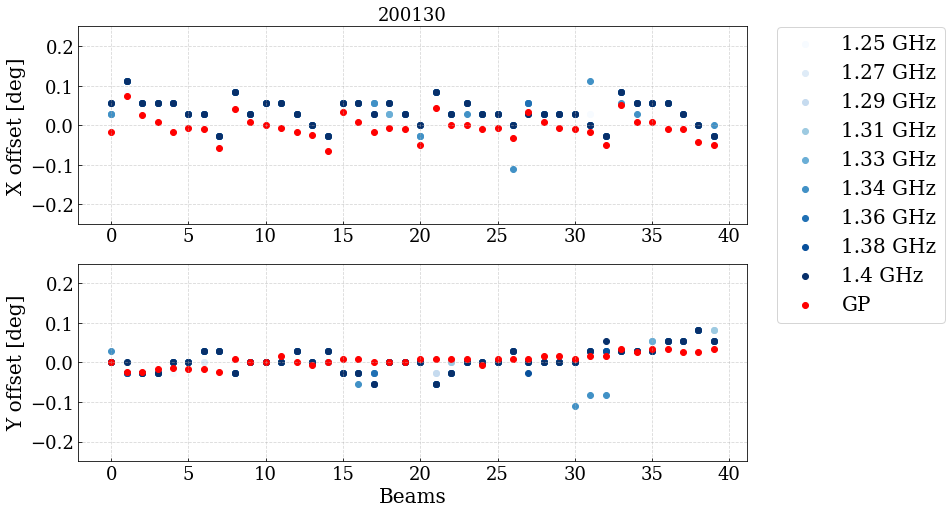

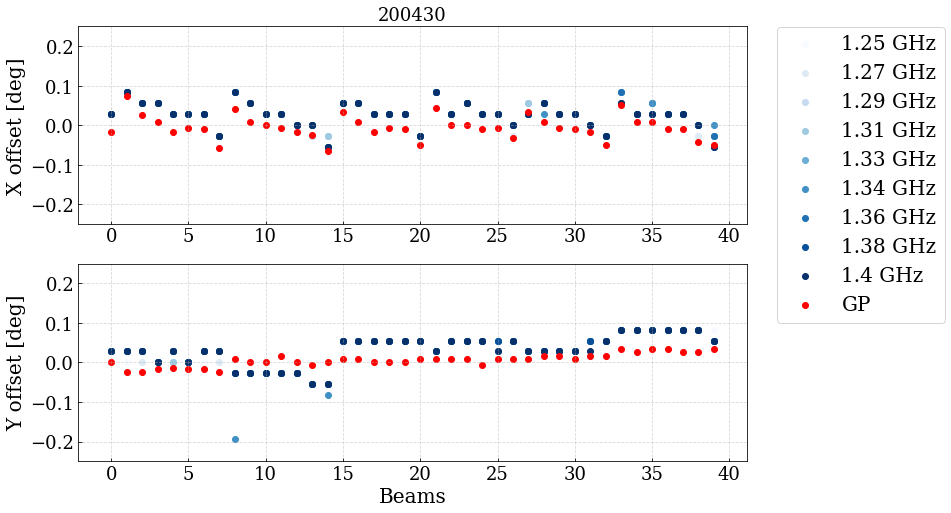

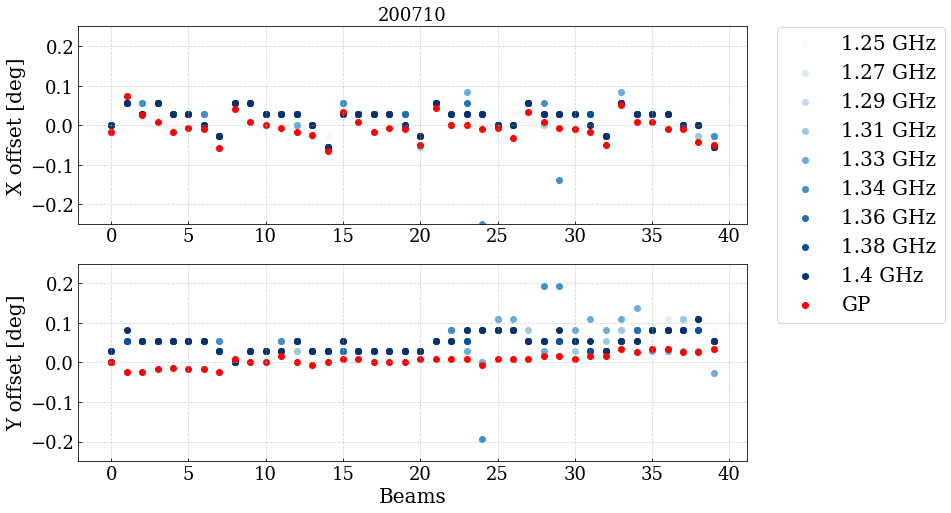

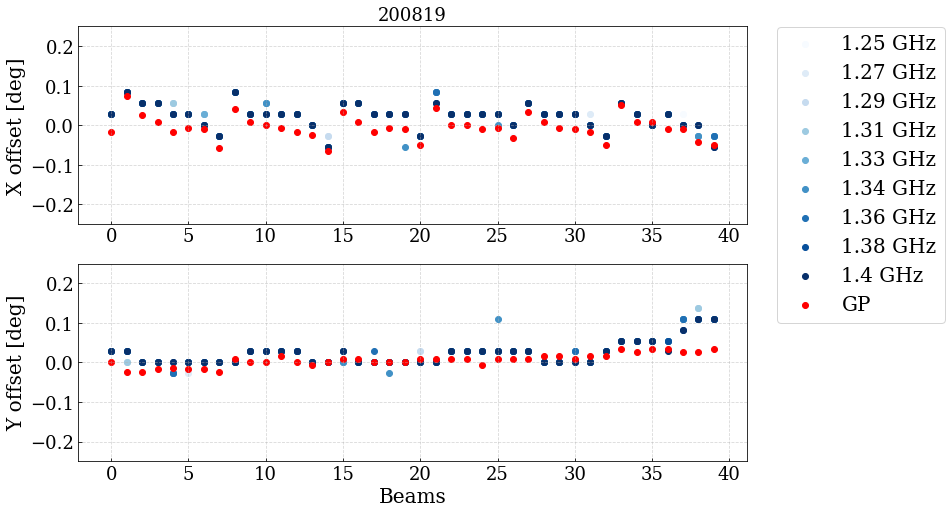

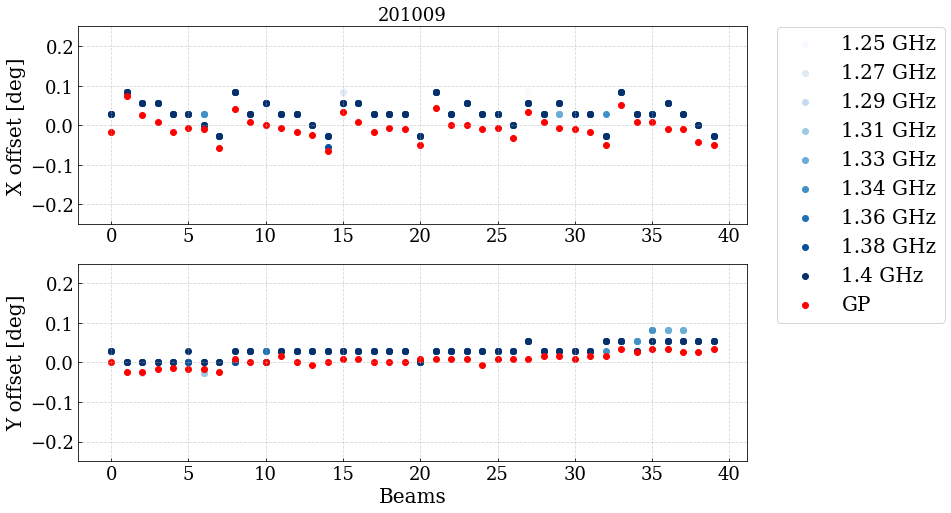

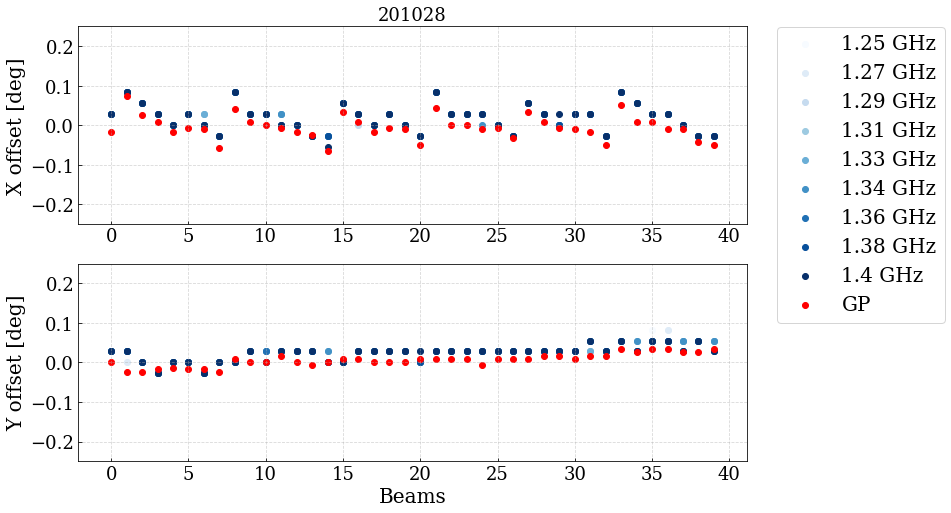

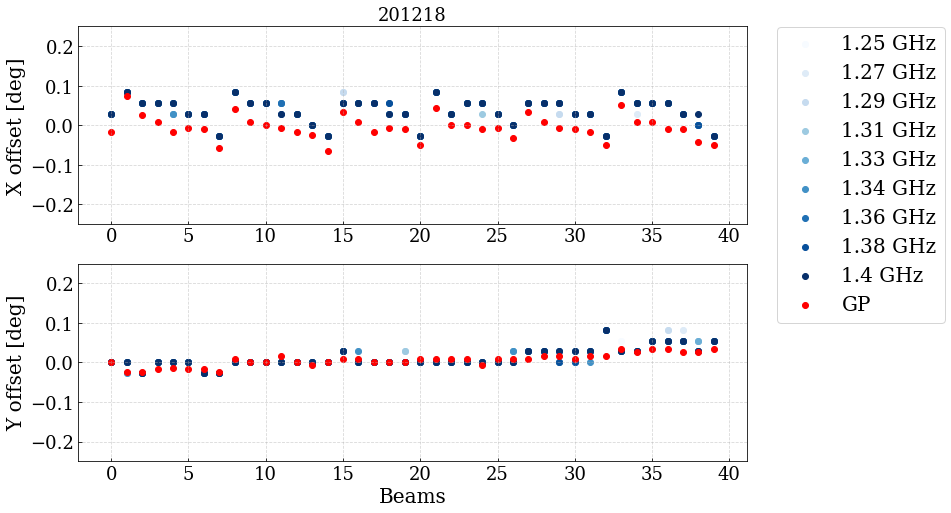

In [59]:
# plot position angle for all beams at different frequencies

dates = ['190628', '190722', '190821', '190826', '190912', '190916', '190918', '191008', '191023', '191026', '191120', '200130', '200430', '200710', '200819', '201009', '201028', '201218']
freq_label = np.array([1234867750.0, 1253178250.0, 1271488750.0, 1289799250.0, 1308109750.0, 1326420250.0, 1344730750.0, 1363041250.0, 1381351750.0, 1399662250.0])
freq_label_gh = np.round(freq_label/1e9,2)

n = 9
colors = mpl.cm.Blues(np.linspace(0,1,n))

data_gp = ascii.read('/tank/denes/cbeams/beam_FWHM_orig.csv', format='csv', fast_reader=False)
x_off_gp = (836.5-data_gp['x_0'])*(0.00111111115346)
y_off_gp = (836.5-data_gp['y_0'])*(0.00111111115346)

for date in dates:
    fig = plt.figure( figsize=(12, 8))
    ax = fig.add_subplot(211)
    ax.set_title(date, fontsize=18)
    for freq in range(1,10):
        data = ascii.read('/tank/apertif/driftscans/fits_files/{}/beam_FWHM_{}_I_{}.csv'.format(date, date, freq), format='csv', fast_reader=False)
        x_off = (20-data['x_0'])*(100. / 3600.)
        ax.scatter(range(40), x_off, label='{} GHz'.format(freq_label_gh[freq]), color=colors[freq])

    ax.scatter(range(40), x_off_gp, label='GP', color='red')
    ax.set_ylabel('X offset [deg]', fontsize=20)
    #ax.set_xlabel('Beams', fontsize=20)
    ax.set_ylim(-0.25,0.25)
    #ax.set_ylim(-0.6,0.6)
    ax.legend(bbox_to_anchor=(1.03, 1.05)) 
    plt.grid(linestyle='--', alpha=0.5)
    ax.tick_params(axis='both', which='major', labelsize=18)
    
    ax = fig.add_subplot(212)
    for freq in range(1,10):
        data = ascii.read('/tank/apertif/driftscans/fits_files/{}/beam_FWHM_{}_I_{}.csv'.format(date, date, freq), format='csv', fast_reader=False)
        y_off = (20-data['y_0'])*(100. / 3600.)
        ax.scatter(range(40), y_off, label=freq, color=colors[freq])

    ax.scatter(range(40), y_off_gp, label='GP', color='red')
    ax.set_ylabel('Y offset [deg]', fontsize=20)
    ax.set_xlabel('Beams', fontsize=20)
    ax.set_ylim(-0.25,0.25)
    #ax.set_ylim(-0.6,0.6)
    plt.grid(linestyle='--', alpha=0.5)
    ax.tick_params(axis='both', which='major', labelsize=18)
    
    plt.savefig('/tank/denes/drift_scan/plots/{}_xy_off_gp.png'.format(date), bbox_inches="tight", dpi=200)


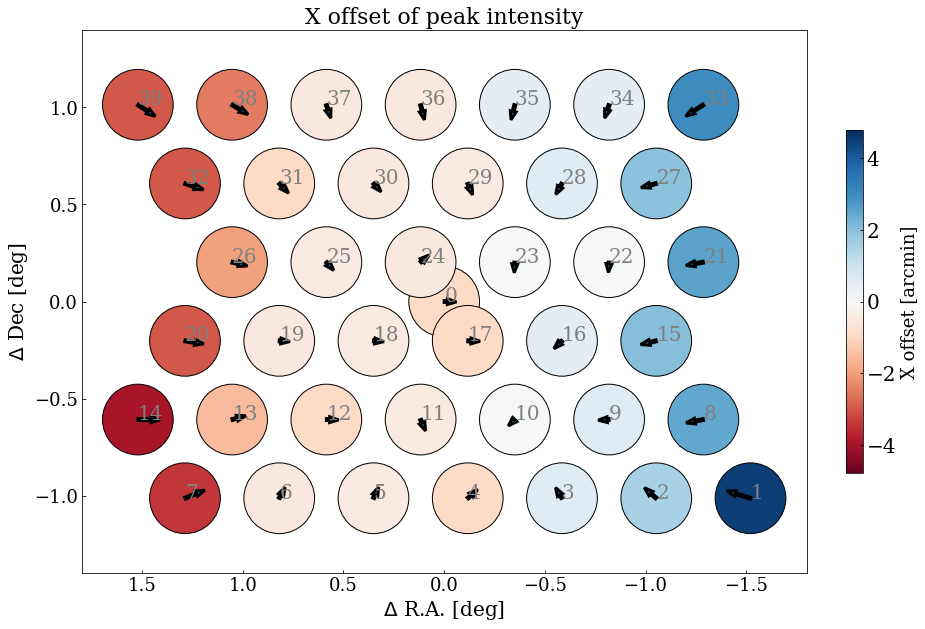

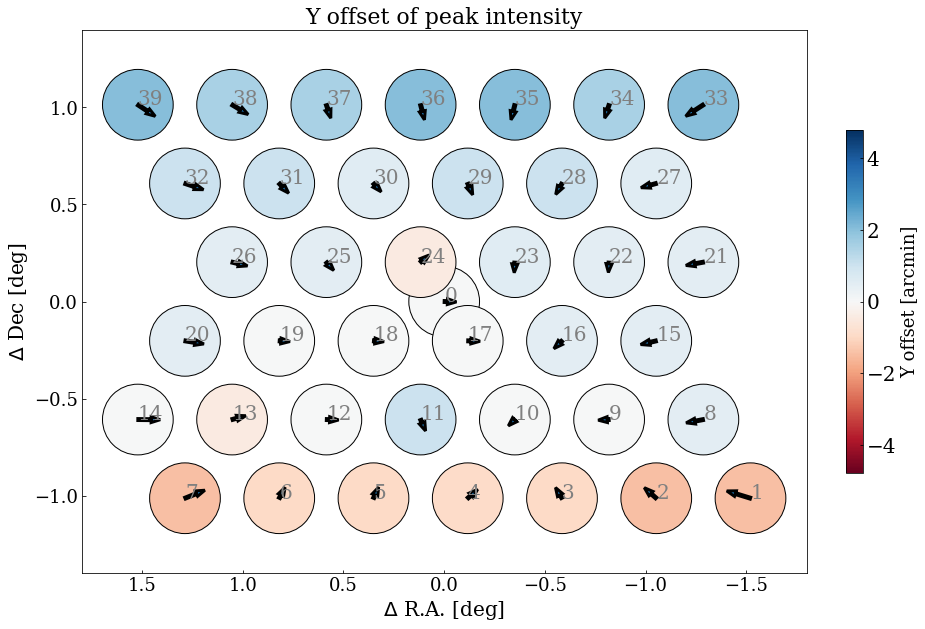

In [37]:
def readfile(filename):
    ra=[]
    dec=[]
    for line in open(filename).readlines():
        if 'd' not in line:
            vals = line.split(' ')
            ra.append(float(vals[0]))
            dec.append(float(vals[1]))

    return np.array(ra), np.array(dec)
src_ra = 0
src_dec = 0

bm_dHA, bm_dDec = readfile('/home/denes/pattern39+1.txt')
phc_ra = src_ra + bm_dHA / np.cos(np.deg2rad(src_dec))
phc_dec = src_dec + bm_dDec

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111)

data_gp = ascii.read('/tank/denes/cbeams/beam_FWHM_norm.csv', format='csv', fast_reader=False)
x_off_gp = (836.5-data_gp['x_0'])*(0.00111111115346)*60
y_off_gp = (836.5-data_gp['y_0'])*(0.00111111115346)*60

im = plt.scatter(phc_ra, phc_dec, c=x_off_gp, cmap='RdBu', s=5000, edgecolors='k', vmin=-0.08*60, vmax=0.08*60)
for i in range(0,40):
    ax.text(phc_ra[i], phc_dec[i], s=i, color='grey')
    plt.arrow(phc_ra[i], phc_dec[i], x_off_gp[i]/60, y_off_gp[i]/-60, width=0.01, lw=3)

ax.set_title('X offset of peak intensity', fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_xlabel('$\Delta$ R.A. [deg]', fontsize=20)
ax.set_ylabel('$\Delta$ Dec [deg]', fontsize=20)
cbar_hi = plt.colorbar(im, orientation='vertical', fraction=0.022, pad=0.05)
cbar_hi.set_label('X offset [arcmin]', size=18)

ax.set_xlim([1.8,-1.8])
ax.set_ylim([-1.4,1.4])
fig.savefig('/tank/denes/drift_scan/plots/x_offset_GP_map.png',dpi=200)


fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111)

data_gp = ascii.read('/tank/denes/cbeams/beam_FWHM_norm.csv', format='csv', fast_reader=False)
x_off_gp = (836.5-data_gp['x_0'])*(0.00111111115346)*60
y_off_gp = (836.5-data_gp['y_0'])*(0.00111111115346)*60

im = plt.scatter(phc_ra, phc_dec, c=y_off_gp, cmap='RdBu', s=5000, edgecolors='k', vmin=-0.08*60, vmax=0.08*60)
for i in range(0,40):
    ax.text(phc_ra[i], phc_dec[i], s=i, color='grey')
    plt.arrow(phc_ra[i], phc_dec[i], x_off_gp[i]/60, y_off_gp[i]/-60,width=0.01, lw=3)

    

ax.set_title('Y offset of peak intensity', fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_xlabel('$\Delta$ R.A. [deg]', fontsize=20)
ax.set_ylabel('$\Delta$ Dec [deg]', fontsize=20)
cbar_hi = plt.colorbar(im, orientation='vertical', fraction=0.022, pad=0.05)
cbar_hi.set_label('Y offset [arcmin]', size=18)

ax.set_xlim([1.8,-1.8])
ax.set_ylim([-1.4,1.4])

fig.savefig('/tank/denes/drift_scan/plots/y_offset_GP_map.png',dpi=200)

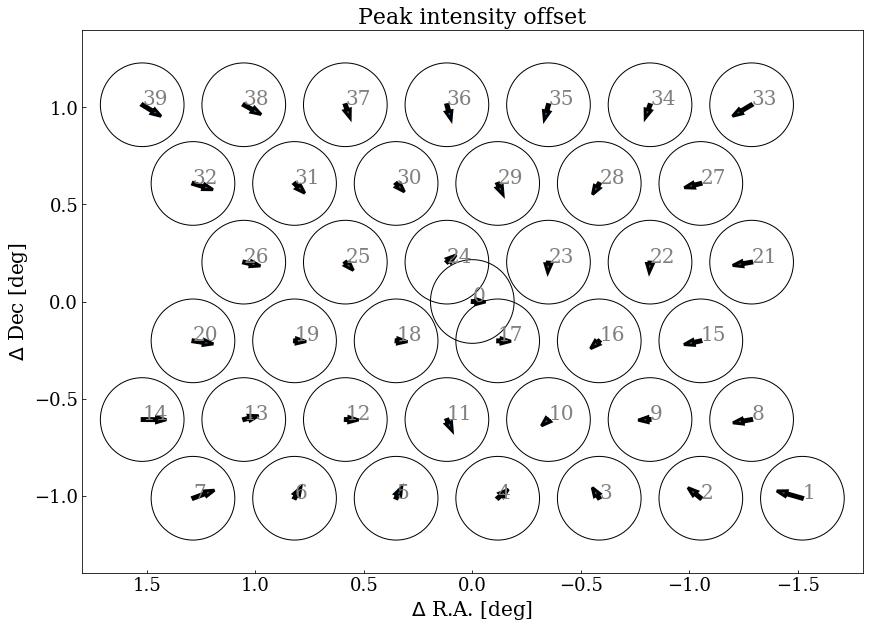

In [42]:
def readfile(filename):
    ra=[]
    dec=[]
    for line in open(filename).readlines():
        if 'd' not in line:
            vals = line.split(' ')
            ra.append(float(vals[0]))
            dec.append(float(vals[1]))

    return np.array(ra), np.array(dec)
src_ra = 0
src_dec = 0

bm_dHA, bm_dDec = readfile('/home/denes/pattern39+1.txt')
phc_ra = src_ra + bm_dHA / np.cos(np.deg2rad(src_dec))
phc_dec = src_dec + bm_dDec

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111)

data_gp = ascii.read('/tank/denes/cbeams/beam_FWHM_norm.csv', format='csv', fast_reader=False)
x_off_gp = (836.5-data_gp['x_0'])*(0.00111111115346)*60
y_off_gp = (836.5-data_gp['y_0'])*(0.00111111115346)*60

im = plt.scatter(phc_ra, phc_dec, s=7000, facecolors='none', edgecolors='k', vmin=-0.08*60, vmax=0.08*60)
for i in range(0,40):
    ax.text(phc_ra[i], phc_dec[i], s=i, color='grey')
    plt.arrow(phc_ra[i], phc_dec[i], x_off_gp[i]/60, y_off_gp[i]/-60,width=0.01, lw=3)

    

ax.set_title('Peak intensity offset', fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_xlabel('$\Delta$ R.A. [deg]', fontsize=20)
ax.set_ylabel('$\Delta$ Dec [deg]', fontsize=20)
#cbar_hi = plt.colorbar(im, orientation='vertical', fraction=0.022, pad=0.05)
#cbar_hi.set_label('Y offset [arcmin]', size=18)

ax.set_xlim([1.8,-1.8])
ax.set_ylim([-1.4,1.4])

fig.savefig('/tank/denes/drift_scan/plots/xy_offset_GP_map.png',dpi=200)

In [10]:
dates = ['190628', '190722', '190821', '190826', '190912', '190916', '190918', '191008', '191023', '191026', '191120', '200130', '200430', '200710', '200819', '201009', '201028', '201218']

y_off_av = []
x_off_av = []
y_off_min = []
x_off_min = []
y_off_max = []
x_off_max = []

for date in dates:
    for freq in [1]:
        data = ascii.read('/tank/apertif/driftscans/fits_files/{}/beam_FWHM_{}_I_{}.csv'.format(date, date, freq), format='csv', fast_reader=False)
        x_off = (20-data['x_0'])*(100. / 3600.)
        y_off = (20-data['y_0'])*(100. / 3600.)
        
    y_off_av.append(np.mean(y_off))
    x_off_av.append(np.mean(x_off))
    y_off_min.append(np.min(y_off))
    x_off_min.append(np.min(x_off))
    y_off_max.append(np.max(y_off))
    x_off_max.append(np.max(x_off))
    #print(np.mean(x_off), np.mean(y_off))
    
print(np.mean(x_off_av)*60, np.mean(y_off_av))
print(np.mean(x_off_min), np.mean(y_off_min))
print(np.mean(x_off_max), np.mean(y_off_max)*60)

1.4629629629629628 0.026967592592592595
-0.07253086419753085 -0.026234567901234566
0.08333333333333331 4.907407407407406


# Test stuff

In [10]:
hdulist_gaus = fits.open('/tank/denes/cbeams/00_gp_avg_orig.fits')
data_gaus = hdulist_gaus[0].data
header_gaus = hdulist_gaus[0].header

header_gaus

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 3073                                                  
NAXIS2  =                 3073                                                  
BUNIT   = 'JY/BEAM '  /                                                         
DATE-OBS= '2020-06-24T06:44:56.4'  /                                            
TELESCOP= 'wsrt    '  /                                                         
CRPIX1  =    1.53700000000E+03  /                                               
CDELT1  =   -1.11111115346E-03  /                                               
CRVAL1  =    2.54000000000E+01  /                                               
CTYPE1  = 'RA---NCP'  /                                                         
CRPIX2  =    1.53700000000E+

In [11]:
hdulist_regrid = fits.open('/tank/denes/drift_scan/{}/cont/{}_00_I_model_reg.fits'.format(date, date))
data_regrid = hdulist_regrid[0].data
header_regrid = hdulist_regrid[0].header

header_regrid

SIMPLE  =                    T  /                                               
BITPIX  =                  -32  /                                               
NAXIS   =                    2                                                  
NAXIS1  =                 3073  /                                               
NAXIS2  =                 3073  /                                               
EXTEND  =                    T  /                                               
BSCALE  =    1.00000000000E+00  /                                               
BZERO   =    0.00000000000E+00  /                                               
BLANK   =                   -1  /                                               
CRPIX1  =    1.53700000000E+03  /                                               
CDELT1  =   -1.11111115346E-03  /                                               
CRVAL1  =    2.86897740000E+01  /                                               
CTYPE1  = 'RA---NCP'  /     